In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
df=pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
len(df[df['Outcome']==1]),len(df[df['Outcome']==0])

(268, 500)

In [ ]:
X.shape,y.shape

((768, 8), (768,))

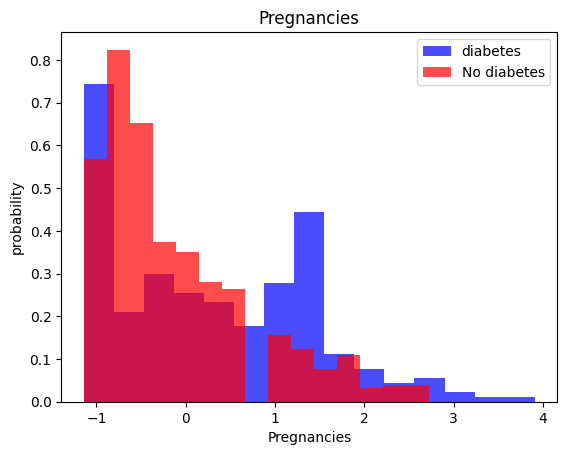

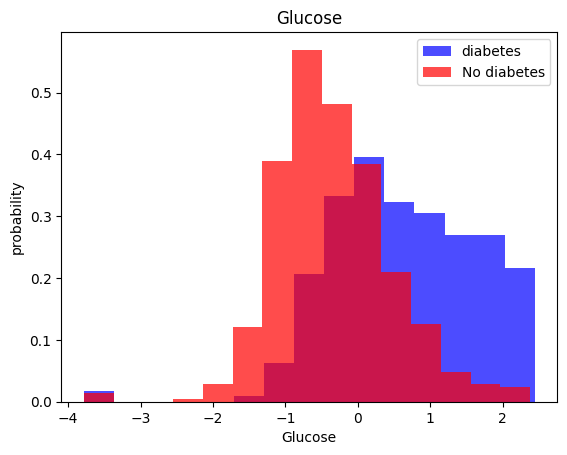

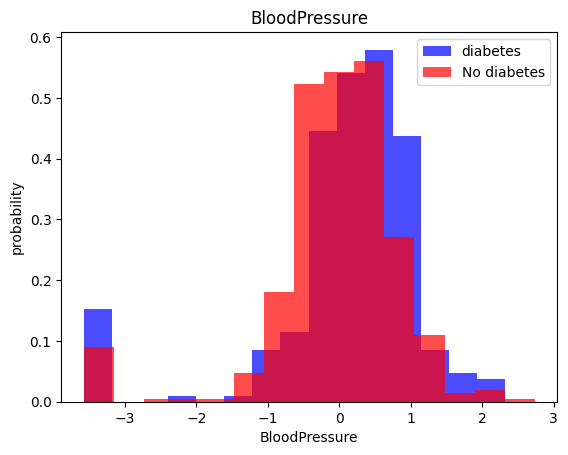

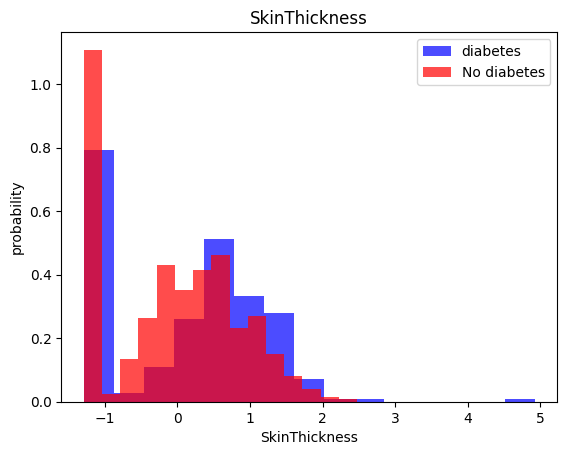

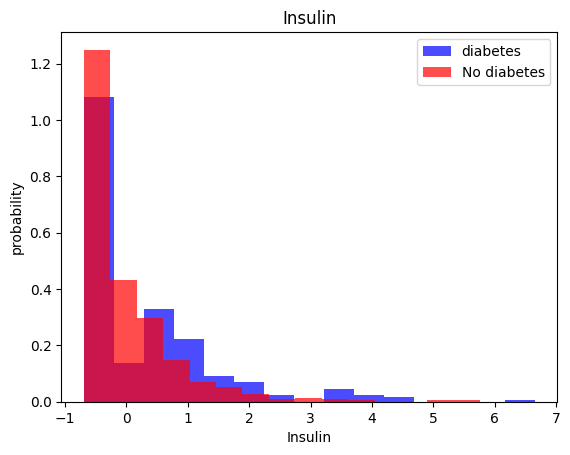

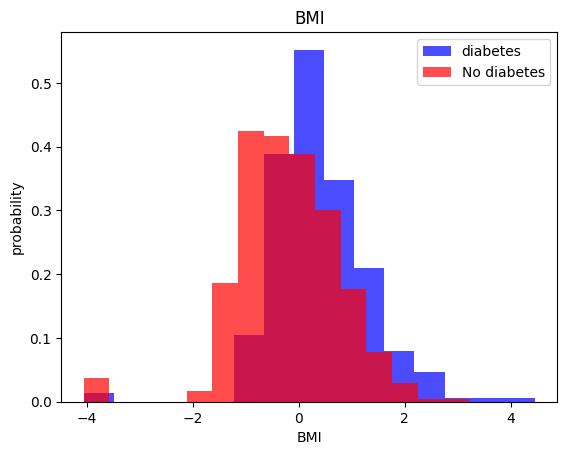

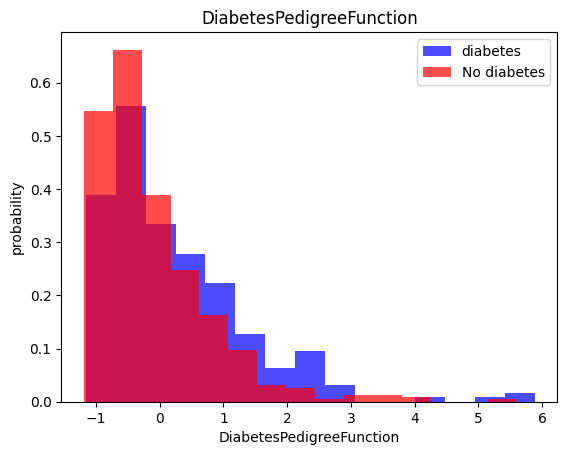

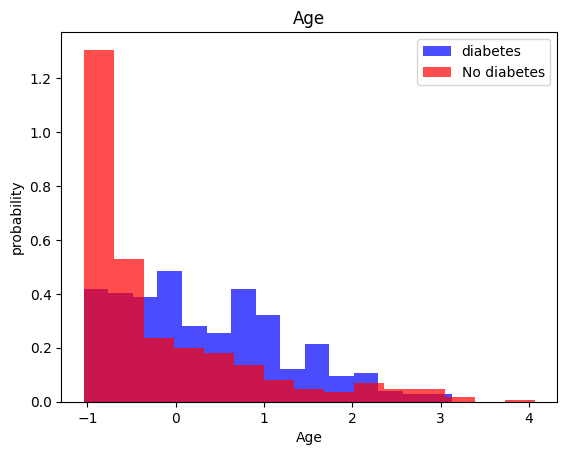

In [ ]:
for i in range(len(df.columns[:-1])):
  label=df.columns[i]
  plt.hist(transformed_df[transformed_df['Outcome']==1][label], color='blue', label='diabetes', alpha=0.7, density=True, bins=15)
  plt.hist(transformed_df[transformed_df['Outcome']==0][label], color='red', label='No diabetes', alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("probability")
  plt.legend()
  plt.show()

In [ ]:
X=df[df.columns[:-1]].values
y=df[df.columns[-1]].values

In [ ]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
data= np.hstack((X,np.reshape(y,(-1,1))))
transformed_df=pd.DataFrame(data,columns=df.columns)

In [ ]:
len(transformed_df[transformed_df['Outcome']==1]),len(transformed_df[transformed_df['Outcome']==0])

(268, 500)

In [ ]:
over= RandomOverSampler()
X,y=over.fit_resample(X,y)

In [ ]:
len(transformed_df[transformed_df['Outcome']==1]),len(transformed_df[transformed_df['Outcome']==0])

(500, 500)

In [ ]:
X_train,X_temp,y_train,y_temp=train_test_split(X,y,test_size=0.4,random_state=0)
X_valid,X_test,y_valid,y_test=train_test_split(X_temp,y_temp,test_size=0.5,random_state=0)

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
model.evaluate(X_train,y_train)

19/19 [==============================] - 0s 3ms/step - loss: 0.7898 - accuracy: 0.4100


[0.7898187637329102, 0.4099999964237213]

In [ ]:
model.evaluate(X_valid,y_valid)

7/7 [==============================] - 0s 4ms/step - loss: 0.7907 - accuracy: 0.4250


[0.7906867265701294, 0.42500001192092896]

In [ ]:
model.fit(X_train,y_train,batch_size=16,epochs=20,validation_data=(X_valid, y_valid))

Epoch 1/20
38/38 [==============================] - 1s 5ms/step - loss: 0.7492 - accuracy: 0.4683 - val_loss: 0.7133 - val_accuracy: 0.5100
Epoch 2/20
38/38 [==============================] - 0s 4ms/step - loss: 0.6867 - accuracy: 0.5633 - val_loss: 0.6674 - val_accuracy: 0.5950
Epoch 3/20
38/38 [==============================] - 0s 4ms/step - loss: 0.6452 - accuracy: 0.6750 - val_loss: 0.6290 - val_accuracy: 0.6800
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.6090 - accuracy: 0.7100 - val_loss: 0.5965 - val_accuracy: 0.7000
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5798 - accuracy: 0.7450 - val_loss: 0.5693 - val_accuracy: 0.7250
Epoch 6/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5577 - accuracy: 0.7450 - val_loss: 0.5449 - val_accuracy: 0.7300
Epoch 7/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5417 - accuracy: 0.7517 - val_loss: 0.5309 - val_accuracy: 0.7300
Epoch 8/20
38/38 [==

In [ ]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4779 - accuracy: 0.7550


[0.4779389500617981, 0.7549999952316284]